# Citation Request
If you find this notebook and dataset helpful for your research, we kindly request you to cite our paper related to this work. The citation details are as follows:
Paper 1: https://ieeexplore.ieee.org/document/10086917
"Utomo, S., John, A., Pratap, A., Jiang, Z. S., Karthikeyan, P., & Hsiung, P. A. (2023, February). AIX implementation in image-based PM2. 5 estimation: Toward an AI model for better understanding. In 2023 15th International Conference on Knowledge and Smart Technology (KST) (pp. 1-6). IEEE. DOI: https://doi.org/10.1109/KST57286.2023.10086917"

Paper 2: https://dl.acm.org/doi/abs/10.1145/3582515.3609531
"Utomo, S., Rouniyar, A., Jiang, G. H., Chang, C. H., Tang, K. C., Hsu, H. C., & Hsiung, P. A. (2023, September). Eff-AQI: An Efficient CNN-Based Model for Air Pollution Estimation: A Study Case in India. In Proceedings of the 2023 ACM Conference on Information Technology for Social Good (pp. 165-172). DOI: https://doi.org/10.1145/3582515.3609531"

Paper 3: https://www.mdpi.com/1999-5903/15/11/371
"Utomo, S., Rouniyar, A., Hsu, H. C., & Hsiung, P. A. (2023). Federated Adversarial Training Strategies for Achieving Privacy and Security in Sustainable Smart City Applications. Future Internet, 15(11), 371. DOI: https://doi.org/10.3390/fi15110371"

### nvidia-smi is script to check the available GPU in our machine

In [1]:
!nvidia-smi

Wed May  8 20:14:14 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   60C    P8             17W /   80W |    2466MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### opendatasets
Opendatasets is a Python library designed to facilitate the downloading of openly accessible datasets from Kaggle directly into the Jupyter Notebook environment. This tool streamlines the process of accessing and integrating Kaggle datasets, enriching research endeavors or educational pursuits. For detailed instructions, refer to the following link: https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook/

In [4]:
#"We have commented out this section as the dataset has already been downloaded."

import opendatasets as od
 
od.download(
    "https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal")


Skipping, found downloaded files in ".\air-pollution-image-dataset-from-india-and-nepal" (use force=True to force download)


In [5]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: C:\Users\Christopher\Desktop\AirLIME


## Dataset Exploration
### Training Data

In [6]:
import pandas as pd
df_train = pd.read_csv('./air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/train_data.csv')
df_train

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Tamil Nadu,TN_UnFSG_2023-03-02-08.30-1.jpg,2023,3,2,8:30,119,69.00,106.00,8.00,358.00,22.00,26.00,c_Unhealthy_for_Sensitive_Groups
1,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-166.jpg,2023,2,24,8:30,68,32.00,61.00,26.00,228.00,5.00,21.00,b_Moderate
2,"Biratnagar, Nepal",BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg,2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.80,2.51,c_Unhealthy_for_Sensitive_Groups
3,Mumbai,MH_UnFSG_2023-03-10-16.00-1-76.jpg,2023,3,10,16:00,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-8.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.00,57.00,f_Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,"Biratnagar, Nepal",BRI_Un_2023-02-09-08.00-1.jpg,2023,2,9,8:00,171,112.46,163.45,31.17,0.96,3.84,18.78,d_Unhealthy
7829,"ITO, Delhi",DEL_SEV_2023-02-17-13.00-2-25.jpg,2023,2,17,13:00,372,348.00,199.00,25.00,67.00,10.00,107.00,f_Severe
7830,"New Ind Town, Faridabad",HAR_VUN_2022-10-02-10.00-1-1489.jpg,2022,10,2,10:00,230,185.00,199.00,10.00,52.00,12.00,26.00,e_Very_Unhealthy
7831,Mumbai,MH_UnFSG_2023-03-14-13.00-1-385.jpg,2023,3,14,13:00,138,90.00,120.00,143.00,21.00,9.00,16.00,c_Unhealthy_for_Sensitive_Groups


<AxesSubplot: title={'center': 'Class Distribution of Training Dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

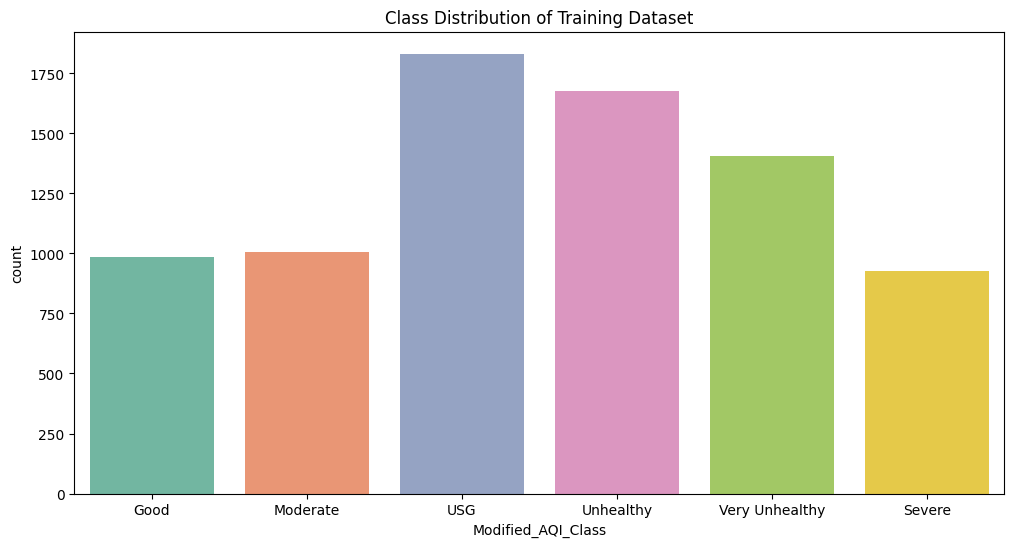

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming AQI_Class column contains categories like 'a_Good', 'b_Moderate', etc.
# You can create a new column with the modified category labels

# Define a mapping dictionary to map the old labels to the new labels
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG', 
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
df_train['Modified_AQI_Class'] = df_train['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Training Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=df_train,x='Modified_AQI_Class', order=custom_order, palette='Set2')

In [8]:
import numpy as np
min_pm2_lable = np.min(df_train['PM2.5'])
max_pm2_lable = np.max(df_train['PM2.5'])
mean_pm2_lable = np.mean(df_train['PM2.5'])
stdev_pm2_lable = np.std(df_train['PM2.5'])
severe = np.count_nonzero(df_train['PM2.5'] > 250.5)
good = np.count_nonzero(df_train['PM2.5'] < 12.1)
moderate = np.count_nonzero((df_train['PM2.5'] > 12) & (df_train['PM2.5'] < 35.5))
sensitive = np.count_nonzero((df_train['PM2.5'] > 35.4) & (df_train['PM2.5'] < 55.5))
unhealthy = np.count_nonzero((df_train['PM2.5'] > 55.4) & (df_train['PM2.5'] < 150.5))
vunhealthy = np.count_nonzero((df_train['PM2.5'] > 150.4) & (df_train['PM2.5'] < 250.5))
print('Minimum label value for PM2.5 :', min_pm2_lable)
print('Maximum label value for PM2.5 :', max_pm2_lable)
print('Average label value for PM2.5 :', mean_pm2_lable)
print('Standard Deviation label value for PM2.5 :', stdev_pm2_lable)
print('Severe class based on PM2.5 value :', severe)
print('Very Unhealthy class based on PM2.5 value :', vunhealthy)
print('Unhealthy class based on PM2.5 value :', unhealthy)
print('Sensitive class based on PM2.5 value :', sensitive)
print('Moderate class based on PM2.5 value :', moderate)
print('Good class based on PM2.5 value :', good)

Minimum label value for PM2.5 : 4.0
Maximum label value for PM2.5 : 500.0
Average label value for PM2.5 : 142.61533256734327
Standard Deviation label value for PM2.5 : 130.09113738604887
Severe class based on PM2.5 value : 2120
Very Unhealthy class based on PM2.5 value : 855
Unhealthy class based on PM2.5 value : 1851
Sensitive class based on PM2.5 value : 959
Moderate class based on PM2.5 value : 1993
Good class based on PM2.5 value : 55


In [9]:
'''
Statsmodels is a Python library that provides classes and functions for estimating and interpreting various statistical models. 
It offers a wide range of tools for statistical analysis, hypothesis testing, and data exploration. 
'''
#!pip install statsmodels

'\nStatsmodels is a Python library that provides classes and functions for estimating and interpreting various statistical models. \nIt offers a wide range of tools for statistical analysis, hypothesis testing, and data exploration. \n'

#### In this experiment, where the focus is on estimating PM2.5 values from input images, it's essential to explore the statistical characteristics and distribution of PM2.5 values in your dataset. By conducting thorough data exploration of PM2.5 values in your dataset, you can gain valuable insights into the characteristics and distribution of air quality measurements. This understanding will inform the development and evaluation of your image-based PM2.5 estimation model.

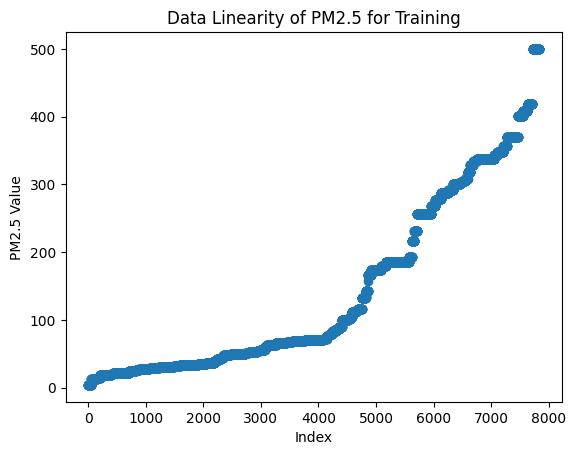

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 4.792e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        20:17:24   Log-Likelihood:                -41560.
No. Observations:                7833   AIC:                         8.312e+04
Df Residuals:                    7831   BIC:                         8.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.2586      1.102    -60.135      0.0

In [10]:
import statsmodels.api as sm
df_pm25 = df_train['PM2.5'].sort_values()
df_pm25 = df_pm25.reset_index(drop=True)
x = df_pm25.index
y = df_pm25
plt.xlabel('Index')
plt.ylabel('PM2.5 Value')
plt.title('Data Linearity of PM2.5 for Training')
plt.scatter(x, y)
plt.show()
# Fit the linear regression model
cX = sm.add_constant(x)
model = sm.OLS(y, cX).fit()
print(model.summary())

### Validation Data 

In [11]:
df_val = pd.read_csv('./air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/val_data.csv')
df_val

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Bengaluru,BENGR_Mod_2023-02-23-08.30-1-401.jpg,2023,2,23,8:30,97,43.00,78.00,26.00,258.00,10.00,17.00,b_Moderate
1,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-221.jpg,2023,2,22,14:00,450,500.00,480.00,91.00,78.00,17.00,47.00,f_Severe
2,"New Ind Town, Faridabad",HAR_VUN_2022-10-02-10.00-1-2361.jpg,2022,10,2,10:00,230,185.00,199.00,10.00,52.00,12.00,26.00,e_Very_Unhealthy
3,"ITO, Delhi",DEL_VUnH_2023-02-16-14.00-2-7.jpg,2023,2,16,14:00,268,401.00,325.00,73.00,88.00,16.00,NaN,e_Very_Unhealthy
4,Mumbai,MH_Good_2023-03-23-17.00-2.jpg,2023,3,23,17:00,47,14.00,41.00,35.00,6.00,5.00,7.00,a_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-1-103.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.00,57.00,f_Severe
1955,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-2-156.jpg,2023,2,20,14:00,363,257.00,139.00,41.00,65.00,35.00,83.00,f_Severe
1956,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-96.jpg,2023,2,22,14:00,450,500.00,480.00,91.00,78.00,17.00,47.00,f_Severe
1957,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 1700-3-72.jpg,2023,2,2,17:00,156,67.06,95.93,52.38,0.52,3.35,6.49,d_Unhealthy


<AxesSubplot: title={'center': 'Class Distribution of Validation Dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

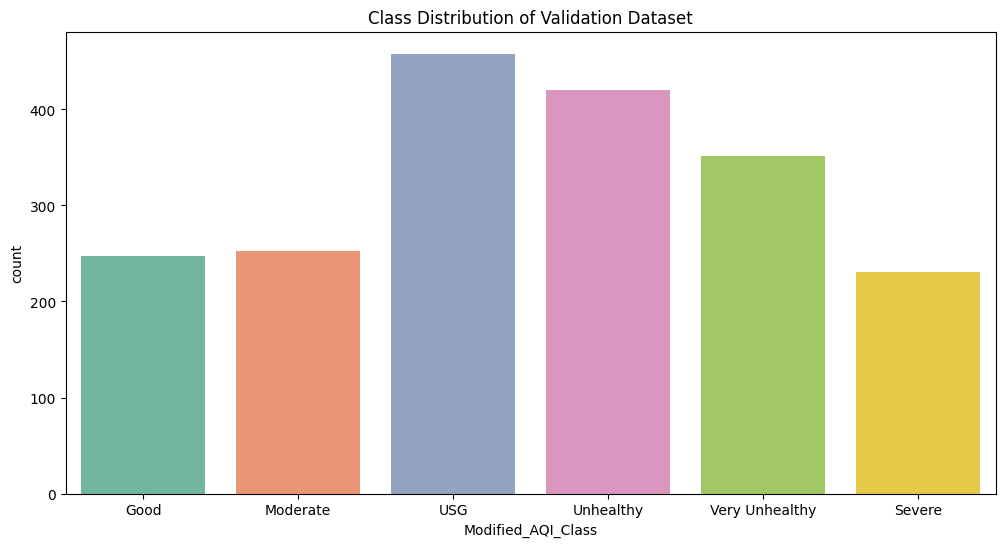

In [12]:
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG', 
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
df_val['Modified_AQI_Class'] = df_val['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Validation Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=df_val,x='Modified_AQI_Class', order=custom_order, palette='Set2')

In [13]:
min_pm2_lable = np.min(df_val['PM2.5'])
max_pm2_lable = np.max(df_val['PM2.5'])
mean_pm2_lable = np.mean(df_val['PM2.5'])
stdev_pm2_lable = np.std(df_val['PM2.5'])
severe = np.count_nonzero(df_val['PM2.5'] > 250.5)
good = np.count_nonzero(df_val['PM2.5'] < 12.1)
moderate = np.count_nonzero((df_val['PM2.5'] > 12) & (df_val['PM2.5'] < 35.5))
sensitive = np.count_nonzero((df_val['PM2.5'] > 35.4) & (df_val['PM2.5'] < 55.5))
unhealthy = np.count_nonzero((df_val['PM2.5'] > 55.4) & (df_val['PM2.5'] < 150.5))
vunhealthy = np.count_nonzero((df_val['PM2.5'] > 150.4) & (df_val['PM2.5'] < 250.5))
print('Minimum label value for PM2.5 :', min_pm2_lable)
print('Maximum label value for PM2.5 :', max_pm2_lable)
print('Average label value for PM2.5 :', mean_pm2_lable)
print('Standard Deviation label value for PM2.5 :', stdev_pm2_lable)
print('Severe class based on PM2.5 value :', severe)
print('Very Unhealthy class based on PM2.5 value :', vunhealthy)
print('Unhealthy class based on PM2.5 value :', unhealthy)
print('Sensitive class based on PM2.5 value :', sensitive)
print('Moderate class based on PM2.5 value :', moderate)
print('Good class based on PM2.5 value :', good)

Minimum label value for PM2.5 : 4.0
Maximum label value for PM2.5 : 500.0
Average label value for PM2.5 : 143.66196528841243
Standard Deviation label value for PM2.5 : 132.8791784590799
Severe class based on PM2.5 value : 539
Very Unhealthy class based on PM2.5 value : 202
Unhealthy class based on PM2.5 value : 449
Sensitive class based on PM2.5 value : 261
Moderate class based on PM2.5 value : 499
Good class based on PM2.5 value : 9


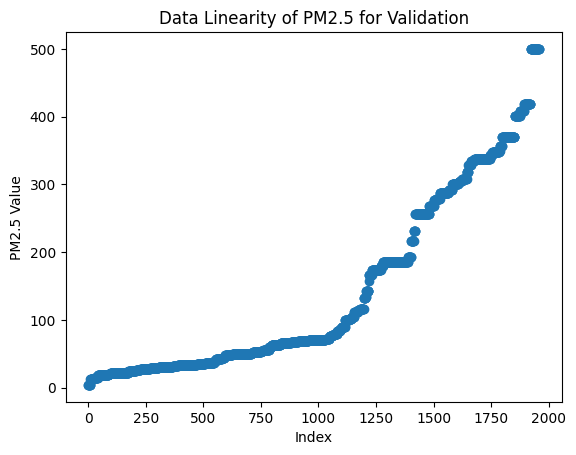

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        20:17:27   Log-Likelihood:                -10491.
No. Observations:                1959   AIC:                         2.099e+04
Df Residuals:                    1957   BIC:                         2.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.5872      2.315    -29.622      0.0

In [14]:
df_pm25_val = df_val['PM2.5'].sort_values()
df_pm25_val = df_pm25_val.reset_index(drop=True)
x = df_pm25_val.index
y = df_pm25_val
plt.xlabel('Index')
plt.ylabel('PM2.5 Value')
plt.title('Data Linearity of PM2.5 for Validation')
plt.scatter(x, y)
plt.show()
# Fit the linear regression model
cX = sm.add_constant(x)
model = sm.OLS(y, cX).fit()
print(model.summary())

### Testing Data 

In [15]:
df_test = pd.read_csv('./air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/testing_data.csv')
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Mumbai,MH_Good_2023-03-23-17.00-1-288.jpg,2023,3,23,17:00,47,14.00,41.00,35.00,6.00,5.00,7.00,a_Good
1,Tamil Nadu,TN_Good_2023-02-20-08.30-1-44.jpg,2023,2,20,8:30,37,37.00,28.00,22.00,1.00,22.00,5.00,a_Good
2,Bengaluru,BENGR_Mod_2023-02-21-08.30-1-461.jpg,2023,2,21,8:30,56,27.00,53.00,27.00,265.00,19.00,16.00,b_Moderate
3,Mumbai,MH_UN_2023-03-02-08.00-1-86.jpg,2023,3,2,8:00,156,305.00,193.00,8.00,100.00,NaN,119.00,d_Unhealthy
4,Tamil Nadu,TN_UnFSG_2023-03-09-09.00-2-86.jpg,2023,3,9,9:00,134,84.00,121.00,7.00,235.00,21.00,29.00,c_Unhealthy_for_Sensitive_Groups
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,"Biratnagar, Nepal",BIR_UFSG_2023-02-14- 14.30-1-43.jpg,2023,2,14,14:30,101,33.18,48.66,68.31,0.25,3.25,0.67,c_Unhealthy_for_Sensitive_Groups
2444,Bengaluru,BENGR_Mod_2023-02-23-08.30-1-326.jpg,2023,2,23,8:30,97,43.00,78.00,26.00,258.00,10.00,17.00,b_Moderate
2445,"Knowledge park, Greater Noida",UP_VUN_2023-02-27-10.30-1-225.jpg,2023,2,27,10:30,299,329.00,299.00,2.00,20.00,48.00,27.00,e_Very_Unhealthy
2446,"Knowledge park, Greater Noida",UP_SEV_2023-02-20-08.30-1-40.jpg,2023,2,20,8:30,331,356.00,248.00,2.00,109.00,11.00,83.00,f_Severe


<AxesSubplot: title={'center': 'Class Distribution of Testing Dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

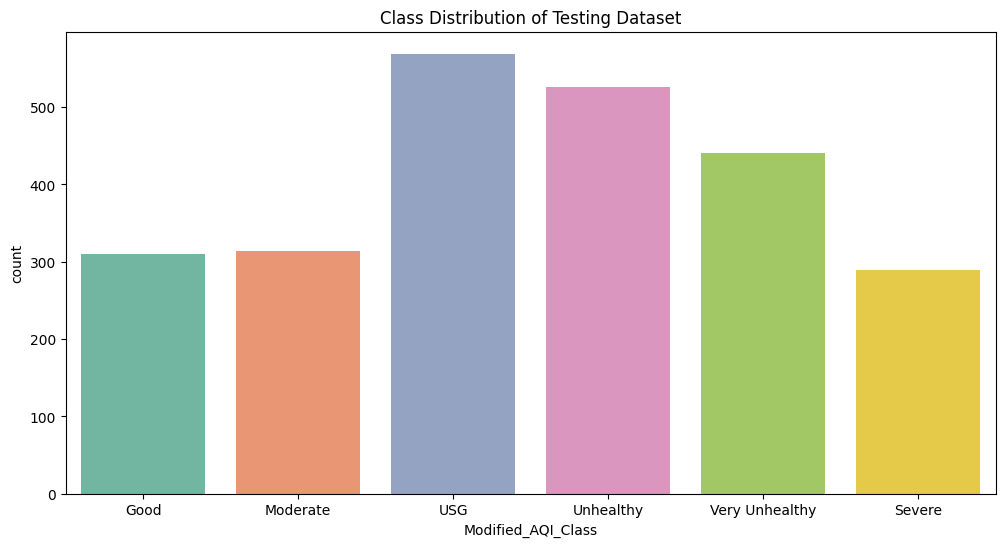

In [16]:
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG', 
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
df_test['Modified_AQI_Class'] = df_test['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Testing Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=df_test,x='Modified_AQI_Class', order=custom_order, palette='Set2')

In [17]:
min_pm2_lable = np.min(df_test['PM2.5'])
max_pm2_lable = np.max(df_test['PM2.5'])
mean_pm2_lable = np.mean(df_test['PM2.5'])
stdev_pm2_lable = np.std(df_test['PM2.5'])
severe = np.count_nonzero(df_test['PM2.5'] > 250.5)
good = np.count_nonzero(df_test['PM2.5'] < 12.1)
moderate = np.count_nonzero((df_test['PM2.5'] > 12) & (df_test['PM2.5'] < 35.5))
sensitive = np.count_nonzero((df_test['PM2.5'] > 35.4) & (df_test['PM2.5'] < 55.5))
unhealthy = np.count_nonzero((df_test['PM2.5'] > 55.4) & (df_test['PM2.5'] < 150.5))
vunhealthy = np.count_nonzero((df_test['PM2.5'] > 150.4) & (df_test['PM2.5'] < 250.5))
print('Minimum label value for PM2.5 :', min_pm2_lable)
print('Maximum label value for PM2.5 :', max_pm2_lable)
print('Average label value for PM2.5 :', mean_pm2_lable)
print('Standard Deviation label value for PM2.5 :', stdev_pm2_lable)
print('Severe class based on PM2.5 value :', severe)
print('Very Unhealthy class based on PM2.5 value :', vunhealthy)
print('Unhealthy class based on PM2.5 value :', unhealthy)
print('Sensitive class based on PM2.5 value :', sensitive)
print('Moderate class based on PM2.5 value :', moderate)
print('Good class based on PM2.5 value :', good)

Minimum label value for PM2.5 : 4.0
Maximum label value for PM2.5 : 500.0
Average label value for PM2.5 : 143.99029411764707
Standard Deviation label value for PM2.5 : 131.34486506303384
Severe class based on PM2.5 value : 673
Very Unhealthy class based on PM2.5 value : 263
Unhealthy class based on PM2.5 value : 598
Sensitive class based on PM2.5 value : 278
Moderate class based on PM2.5 value : 615
Good class based on PM2.5 value : 21


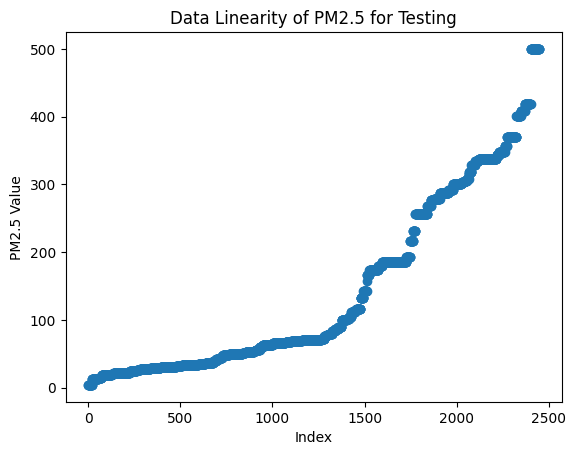

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        20:17:30   Log-Likelihood:                -13004.
No. Observations:                2448   AIC:                         2.601e+04
Df Residuals:                    2446   BIC:                         2.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.9560      1.983    -33.761      0.0

In [18]:
df_pm25_test = df_test['PM2.5'].sort_values()
df_pm25_test = df_pm25_test.reset_index(drop=True)
x = df_pm25_test.index
y = df_pm25_test
plt.xlabel('Index')
plt.ylabel('PM2.5 Value')
plt.title('Data Linearity of PM2.5 for Testing')
plt.scatter(x, y)
plt.show()
# Fit the linear regression model
cX = sm.add_constant(x)
model = sm.OLS(y, cX).fit()
print(model.summary())

# Model Development and Training Process

In [21]:
#Import all necessary library
import sys
import numpy as np

from typing import Dict, Optional, Tuple
from pathlib import Path

import math
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend #Keras version 2.1.6
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate, LeakyReLU, Input, Conv2D, MaxPooling2D, BatchNormalization, Add 

from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
#from PIL import Image

from sklearn.metrics import r2_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


%matplotlib inline

os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [22]:
#Preparing label data for Training
y_train = df_train[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
y_train

,AQI,PM2.5,PM10,O3,CO,SO2,NO2
0,119,69.00,106.00,8.00,358.00,22.00,26.00
1,68,32.00,61.00,26.00,228.00,5.00,21.00
2,141,47.96,68.92,65.57,0.41,2.80,2.51
3,141,72.00,108.00,NaN,NaN,NaN,63.00
4,449,337.00,198.00,23.00,24.00,13.00,57.00
...,...,...,...,...,...,...,...
7828,171,112.46,163.45,31.17,0.96,3.84,18.78
7829,372,348.00,199.00,25.00,67.00,10.00,107.00
7830,230,185.00,199.00,10.00,52.00,12.00,26.00
7831,138,90.00,120.00,143.00,21.00,9.00,16.00


In [23]:
#Preparing label data for Validation
y_val = df_val[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
y_val

,AQI,PM2.5,PM10,O3,CO,SO2,NO2
0,97,43.00,78.00,26.00,258.00,10.00,17.00
1,450,500.00,480.00,91.00,78.00,17.00,47.00
2,230,185.00,199.00,10.00,52.00,12.00,26.00
3,268,401.00,325.00,73.00,88.00,16.00,NaN
4,47,14.00,41.00,35.00,6.00,5.00,7.00
...,...,...,...,...,...,...,...
1954,449,337.00,198.00,23.00,24.00,13.00,57.00
1955,363,257.00,139.00,41.00,65.00,35.00,83.00
1956,450,500.00,480.00,91.00,78.00,17.00,47.00
1957,156,67.06,95.93,52.38,0.52,3.35,6.49


In [24]:
#Preparing label data for Testing
y_test = df_test[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
y_test

,AQI,PM2.5,PM10,O3,CO,SO2,NO2
0,47,14.00,41.00,35.00,6.00,5.00,7.00
1,37,37.00,28.00,22.00,1.00,22.00,5.00
2,56,27.00,53.00,27.00,265.00,19.00,16.00
3,156,305.00,193.00,8.00,100.00,NaN,119.00
4,134,84.00,121.00,7.00,235.00,21.00,29.00
...,...,...,...,...,...,...,...
2443,101,33.18,48.66,68.31,0.25,3.25,0.67
2444,97,43.00,78.00,26.00,258.00,10.00,17.00
2445,299,329.00,299.00,2.00,20.00,48.00,27.00
2446,331,356.00,248.00,2.00,109.00,11.00,83.00


In [25]:
#This function takes the path to an RGB image file as input, reads the image using Keras library and converts it to a NumPy array. 
#You can then use this array as input to your machine learning model.

def build_x(path, y, df):
    train_img = []
    for i in range(len(y)):
        img = image.load_img(path + df['Filename'][i])
        img = image.img_to_array(img)
        img = img / 255
        train_img.append(img)

    x = np.array(train_img)
    return x

#### Converting Training Images to Array

In [26]:
train_img = build_x('./air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/',y_train, df_train)
train_img.shape

(7833, 224, 224, 3)

#### Converting Validation Images to Array

In [27]:
val_img = build_x('./air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/',y_val, df_val)
val_img.shape

(1959, 224, 224, 3)

#### Converting Testing Images to Array

In [28]:
test_img = build_x('./air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/',y_test, df_test)
test_img.shape

(2448, 224, 224, 3)

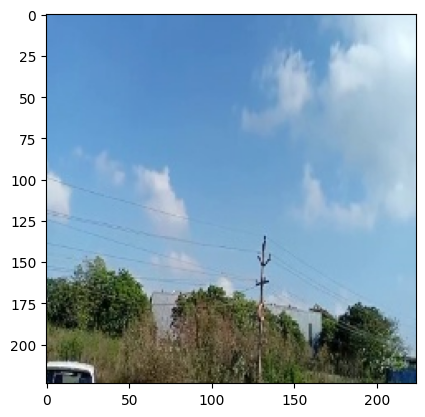

In [29]:
plt.imshow(test_img[1])

In [30]:
y_test['PM2.5'][1]

37.0

### Model Development
For a detailed explanation of our model architecture, please refer to our paper available at https://dl.acm.org/doi/abs/10.1145/3582515.3609531. Our paper provides comprehensive information about the design choices, network architecture, and training procedures employed in our model for PM2.5 estimation from input images. We believe that a thorough understanding of the model architecture presented in the paper will enhance your comprehension and facilitate the replication of our results. Thank you for your interest in our work!

In [31]:
# Create the input tensor
inputs = Input(shape=(224, 224, 3))

# Define the VGG16 convolutional layers
conv1 = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(inputs)
leak1 = LeakyReLU(alpha=0.1)(conv1)
conv2 = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(leak1)
leak2 = LeakyReLU(alpha=0.1)(conv2)
pool1 = MaxPooling2D((3, 3), strides=(2, 2), name='block1_pool')(leak2)

conv3 = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(pool1)
leak3 = LeakyReLU(alpha=0.1)(conv3)
conv4 = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(leak3)
leak4 = LeakyReLU(alpha=0.1)(conv4)
pool2 = MaxPooling2D((3, 3), strides=(2, 2), name='block2_pool')(leak4)

conv5 = Conv2D(128, (3, 3), padding='same', name='block3_conv1')(pool2)
leak5 = LeakyReLU(alpha=0.1)(conv5)
res2 = Add()([leak5,pool2])
pool3 = MaxPooling2D((3, 3), strides=(2, 2), name='block3_pool')(res2)

conv7 = Conv2D(128, (3, 3), padding='same', name='block4_conv1')(pool3)
leak7 = LeakyReLU(alpha=0.1)(conv7)
res3 = Add()([leak7,pool3])
pool4 = MaxPooling2D((3, 3), strides=(2, 2), name='block4_pool')(res3)

conv9 = Conv2D(128, (3, 3), padding='same', name='block5_conv1')(pool4)
leak9 = LeakyReLU(alpha=0.1)(conv9)
res4 = Add()([leak9,pool4])
pool5 = MaxPooling2D((3, 3), strides=(2, 2), name='block5_pool')(res4)

conv11 = Conv2D(256, (3, 3), padding='same', name='block6_conv1')(pool5)
leak11 = LeakyReLU(alpha=0.1)(conv11)
conv12 = Conv2D(256, (3, 3), padding='same', name='block6_conv2')(leak11)
leak12 = LeakyReLU(alpha=0.1)(conv12)
pool6 = MaxPooling2D((3, 3), strides=(2, 2), name='block6_pool')(leak12)

# Define the final fully-connected layers
flatten = Flatten()(pool6)
dense1 = Dense(1024)(flatten)
fcLeak1 = LeakyReLU(alpha=0.1)(dense1)
dense2 = Dense(1024)(fcLeak1)
fcLeak2 = LeakyReLU(alpha=0.1)(dense2)
#aqi = Dense(1, activation='linear', name="AQI_output")(fcLeak2)
pm25 = Dense(1, activation='linear', name="PM2.5_output")(fcLeak2)
#pm10 = Dense(1, activation='linear', name="PM10_output")(fcLeak2)
# Create the hybrid model
#model = Model(inputs=inputs, outputs=[aqi,pm25,pm10])
model = Model(inputs=inputs, outputs=pm25)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer=opt)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 64)         0         ['block1_conv1[0][0]']        
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['leaky_re_lu[0][0]']         
                                                                                              

In [32]:
#Uncomment code below if you want to load your pre-trained model for testing
#model.load_weights('./AI_fGood_20230608.best.hdf5')
#but if you don't have the pre-trained model, run the following next cells to train the model

In [33]:
#Specify the file directory where you want to save the weights of your trained model.
weight_path="{}_20240506.best.hdf5".format('LIME')

### Start the model training process

In [34]:
callback = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto'),
    ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                    save_best_only=True, mode='min', save_weights_only = True)]
#history = model.fit(x_origin_train, [y_train['AQI'],y_train['PM2.5'],y_train['PM10']], validation_data=(x_origin_valid, [y_valid['AQI'],y_valid['PM2.5'],y_valid['PM10']]), batch_size=16, epochs=150, callbacks=callback)
history = model.fit(train_img, y_train['PM2.5'], 
                    validation_data=(val_img, y_val['PM2.5']), 
                    batch_size=16, epochs=5, callbacks=callback)

Epoch 1/5
490/490 [==============================] - ETA: 0s - loss: 93.7001
Epoch 1: val_loss improved from inf to 85.58316, saving model to LIME_20240506.best.hdf5
490/490 [==============================] - 1269s 3s/step - loss: 93.7001 - val_loss: 85.5832
Epoch 2/5
490/490 [==============================] - ETA: 0s - loss: 75.1900
Epoch 2: val_loss did not improve from 85.58316
490/490 [==============================] - 1587s 3s/step - loss: 75.1900 - val_loss: 87.0702
Epoch 3/5
490/490 [==============================] - ETA: 0s - loss: 63.4733
Epoch 3: val_loss improved from 85.58316 to 61.94122, saving model to LIME_20240506.best.hdf5
490/490 [==============================] - 1605s 3s/step - loss: 63.4733 - val_loss: 61.9412
Epoch 4/5
490/490 [==============================] - ETA: 0s - loss: 53.5197
Epoch 4: val_loss improved from 61.94122 to 51.46397, saving model to LIME_20240506.best.hdf5
490/490 [==============================] - 1602s 3s/step - loss: 53.5197 - val_loss: 51.

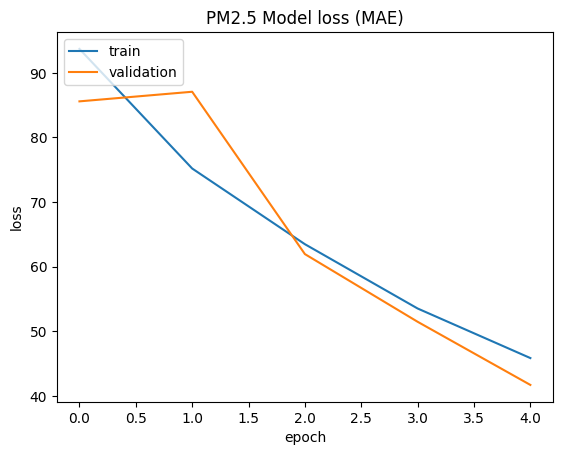

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('PM2.5 Model loss (MAE)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
#model evaluation
loss = model.evaluate(test_img, y_test['PM2.5'], batch_size=16)
print('MAE of PM2.5 is :', loss)

153/153 [==============================] - 125s 814ms/step - loss: 41.5684
MAE of PM2.5 is : 41.56844711303711


In [37]:
y_predict = model.predict(test_img)
print('R2 for PM2.5 is :', r2_score(y_test['PM2.5'], y_predict))

77/77 [==============================] - 124s 2s/step
R2 for PM2.5 is : 0.7532918684301546


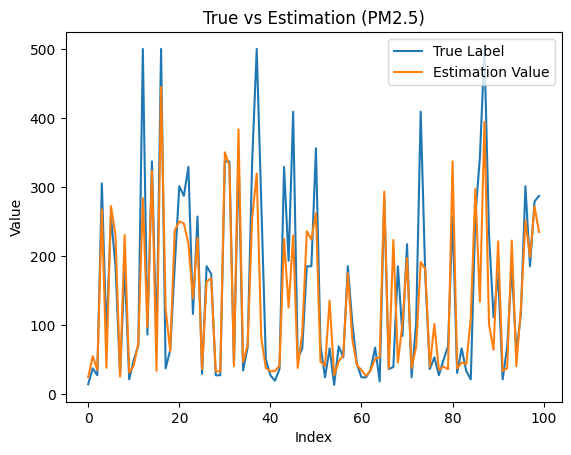

In [38]:
_y_test = y_test['PM2.5'].reset_index(drop=True)
plt.plot(_y_test[:100], label='True Label')
plt.plot(y_predict[:100].tolist(), label='Estimation Value')

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# set the plot title
plt.title('True vs Estimation (PM2.5)')

# Adding a legend
plt.legend()

# display the plot
plt.show()

In [39]:
index = y_test['PM2.5'].index
print(index)

RangeIndex(start=0, stop=2448, step=1)


In [40]:
for i in range(len(index[:10])):
    print(df_test['Filename'][index[i]])

MH_Good_2023-03-23-17.00-1-288.jpg
TN_Good_2023-02-20-08.30-1-44.jpg
BENGR_Mod_2023-02-21-08.30-1-461.jpg
MH_UN_2023-03-02-08.00-1-86.jpg
TN_UnFSG_2023-03-09-09.00-2-86.jpg
DEL_SEV_2023-02-20-14.00-2-181.jpg
HAR_VUN_2022-10-02-10.00-1-2057.jpg
BENGR_Mod_2023-03-09-08.30-1-216.jpg
HAR_VUN_2022-10-02-10.00-1-721.jpg
TN_Good_2023-02-23-08.30-2-11.jpg


In [41]:
'''
The purpose of the following code is to convert the PM2.5 value to a class, 
as the model is attempting to estimate the PM2.5 value. 
Although we can obtain the MAE value after training, it is important to perform this conversion.
It is useful when calculating accuracy, F1 score, and drawing the confusion matrix.
'''

'\nThe purpose of the following code is to convert the PM2.5 value to a class, \nas the model is attempting to estimate the PM2.5 value. \nAlthough we can obtain the MAE value after training, it is important to perform this conversion.\nIt is useful when calculating accuracy, F1 score, and drawing the confusion matrix.\n'

In [42]:
#Classify the predict PM2.5 concentration to the air quality levels

y_predict_pm25 = np.zeros(len(y_predict))

for i in range(len(y_predict)):
    if y_predict[i] <= 12:
        y_predict_pm25[i] = 0
    elif y_predict[i] >= 12.1 and y_predict[i] <= 35.4:
        y_predict_pm25[i] = 1
    elif y_predict[i] >= 35.5 and y_predict[i] <= 55.4:
        y_predict_pm25[i] = 2
    elif y_predict[i] >= 55.5 and y_predict[i] <= 150.4:
        y_predict_pm25[i] = 3
    elif y_predict[i] >= 150.5 and y_predict[i] <= 250.4:
        y_predict_pm25[i] = 4
    elif y_predict[i] > 250.4:
        y_predict_pm25[i] = 5
    else:
        print('Exception Occured!')
    
y_predict_pm25 = y_predict_pm25.astype(int)
    
    
y_predict_pm25

Exception Occured!
Exception Occured!
Exception Occured!
Exception Occured!
Exception Occured!
Exception Occured!


array([1, 2, 1, ..., 5, 5, 3])

In [43]:
#Classify the Ground Truth PM2.5 concentration to the air quality levels

y_test_pm25 = np.zeros(len(_y_test))

for i in range(len(_y_test)):
    if _y_test[i]  <= 12:
        y_test_pm25[i] = 0
    elif _y_test[i] >= 12.1 and _y_test[i] <= 35.4:
        y_test_pm25[i] = 1
    elif _y_test[i] >= 35.5 and _y_test[i] <= 55.4:
        y_test_pm25[i] = 2
    elif _y_test[i] >= 55.5 and _y_test[i] <= 150.4:
        y_test_pm25[i] = 3
    elif _y_test[i] >= 150.5 and _y_test[i] <= 250.4:
        y_test_pm25[i] = 4
    elif _y_test[i] > 250.4:
        y_test_pm25[i] = 5
    else:
        print('Exception Occured!')

y_test_pm25 = y_test_pm25.astype(int)
        
        
y_test_pm25

array([1, 2, 1, ..., 5, 5, 3])

In [44]:
#---Balanced Accuracy for PM2.5---------------

balanced_accuracy_score(y_test_pm25, y_predict_pm25)

0.48714557827355254

In [45]:
#---Classification Accuracy for PM2.5---------

t = 0
n = 0

for i in range(len(y_predict_pm25)):
    if y_predict_pm25[i] == y_test_pm25[i]:
        t = t + 1
    else:
        n = n + 1
        
acc = t / len(y_predict_pm25)

print('Acc: ', acc, ' True: ', t, ' False: ', n)

Acc:  0.5580065359477124  True:  1366  False:  1082


In [46]:
#---Macro F1 Score for PM2.5------------------

f1_score(y_test_pm25, y_predict_pm25, average='macro')

0.45624997538444495

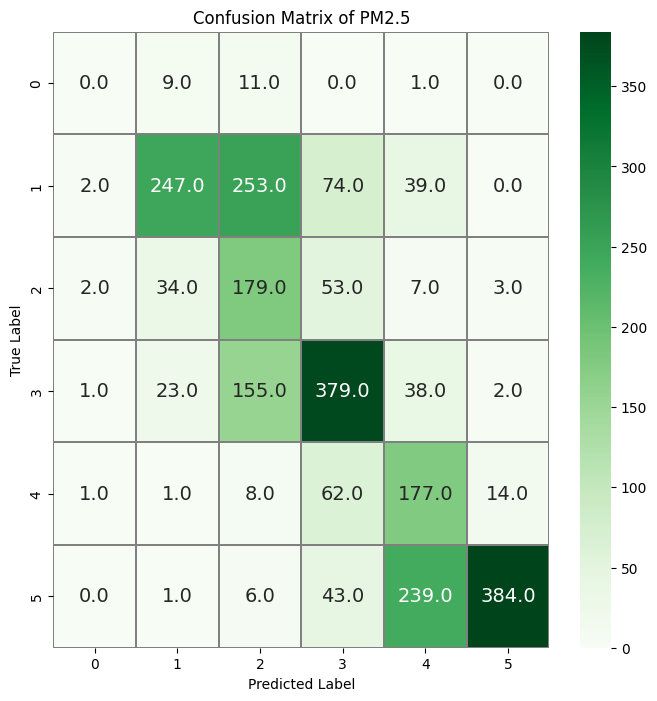

In [47]:
Y_pred_classes = y_predict_pm25
Y_true = y_test_pm25
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax, annot_kws={'fontsize': 14})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of PM2.5")
plt.show()

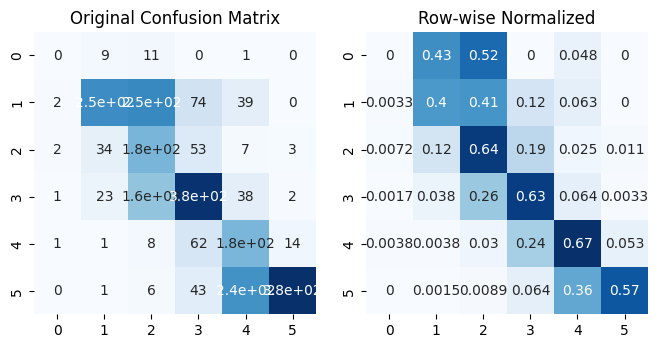

In [48]:
# Row-wise normalization
normalized_matrix_row = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Overall normalization
normalized_matrix_overall = confusion_mtx.astype('float') / confusion_mtx.sum()

# Plot the original confusion matrix
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_mtx, annot=True, cmap='Blues', cbar=False, square=True)
plt.title('Original Confusion Matrix')

# Plot the row-wise normalized confusion matrix
plt.subplot(1, 3, 2)
sns.heatmap(normalized_matrix_row, annot=True, cmap='Blues', cbar=False, square=True)
plt.title('Row-wise Normalized')

# Plot the overall normalized confusion matrix
#plt.subplot(1, 3, 3)
#sns.heatmap(normalized_matrix_overall, annot=True, cmap='Blues', cbar=False, square=True)
#plt.title('Overall Normalized')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [49]:
'''
In order to demonstrate how our model determines the output based on the relevant feature from the input photos, 
we make use of LIME. For more infromation please go to https://github.com/marcotcr/lime
Please uncomment code below to install LIME library
'''
#!pip install lime

'\nIn order to demonstrate how our model determines the output based on the relevant feature from the input photos, \nwe make use of LIME. For more infromation please go to https://github.com/marcotcr/lime\nPlease uncomment code below to install LIME library\n'

In [50]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from PIL import Image

In [51]:
#This code uses the LIME image explainer to explain all of the images that are being tested, 
#and then it saves the explanation to a specified folder.
explainer = lime_image.LimeImageExplainer()
for i in range(len(index)):
    explanation = explainer.explain_instance(test_img[i], model.predict, top_labels=1, hide_color=0, num_samples=500)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
    explained_image = mark_boundaries(temp / 2 + 0.5, mask)
    
    # Save the explained image
    image_path = df_test['Filename'][index[i]]
    explained_image_path = "./LIME_Explanation/lime_" + image_path
    explained_image_pil = Image.fromarray((explained_image * 255).astype(np.uint8))
    explained_image_pil.save(explained_image_path)

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 1s 527ms/step


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Christopher\\Desktop\\AirLIME\\LIME_Explanation\\lime_MH_Good_2023-03-23-17.00-1-288.jpg'

In [ ]:
import matplotlib.image as mpimg

# Specify the folder containing the images
folder_path = "./LIME_Explanation/"

# Get a list of files in the folder
files = os.listdir(folder_path)

# Display the first 16 images of LIME explanation 
num_images_to_display = 16
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        img = mpimg.imread(os.path.join(folder_path, files[i]))
        ax.imshow(img)
        ax.axis('off')

plt.tight_layout()
plt.show()